In [61]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import math 
import time

In [62]:
digits = datasets.load_digits()

# _, axes = plt.subplots(nrows=5, ncols=10, figsize=(10, 10))
# for ax, image, label in zip(axes, digits.images, digits.target):
#     ax.set_axis_off()
#     ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
#     ax.set_title('Training: %i' % label)
# i=0
# for row in axes:
#   for img in row:
#     img.set_axis_off()
#     img.imshow(digits.images[i], cmap=plt.cm.gray_r, interpolation = 'nearest')
#     img.set_title('Real value: ', digits.target[i][)
#     i+=1

data = digits.images.reshape(-1, 64)
start_time = time.time()
X_embedded = TSNE(n_components=2, perplexity=50, early_exaggeration=40).fit_transform(data)
tsne_time = time.time() - start_time 

In [ ]:
f = open("sol.txt", "w")
for point in X_embedded:
  f.write(str(point[0]) + ',' + str(point[1]) + ',' + str(point[2]) + ' ')
f.close()

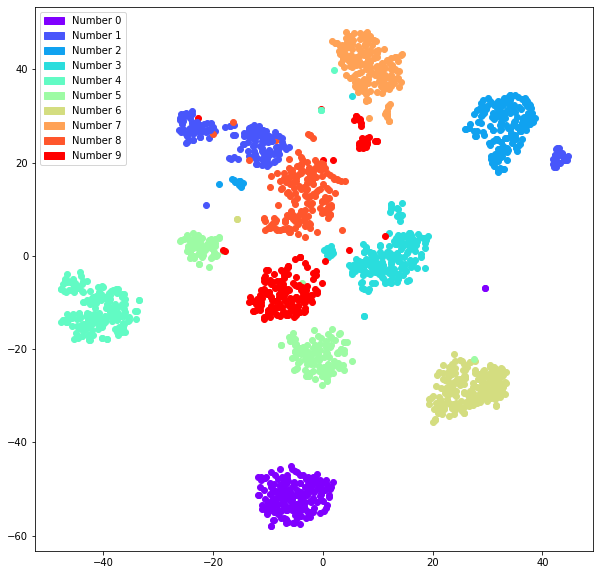

In [5]:
import matplotlib.cm as cm
import matplotlib.patches as mpatches
xs = [x[0] for x in X_embedded]
ys = [x[1] for x in X_embedded]
# zs = [x[2] for x in X_embedded]

# ax = plt.figure(figsize=(15, 15)).add_subplot(projection='3d')
plt.figure(figsize=(10, 10))
colors = cm.rainbow(np.linspace(0, 1, 10))

for i in range(digits.target.shape[0]):
  plt.scatter(xs[i], ys[i], color = colors[digits.target[i]], label = 'Number')

patch = [mpatches.Patch(color=colors[i], label='Number ' + str(i)) for i in range(10)]
plt.legend(handles=patch, loc = 'best')


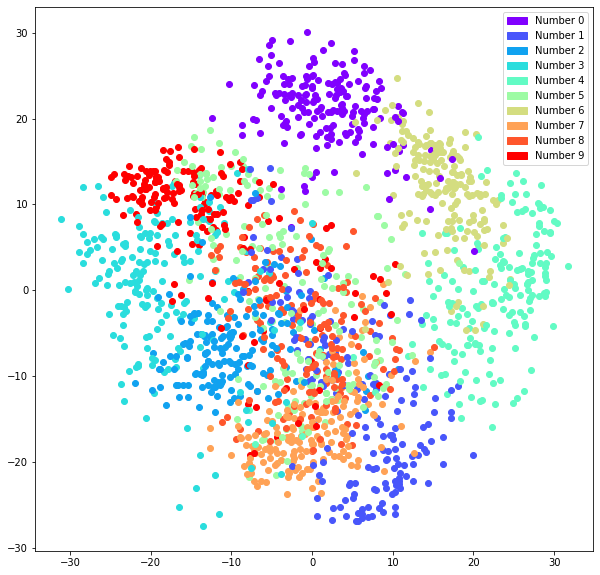

In [7]:
start_time = time.time()
X_embedded_pca = PCA(n_components=2).fit_transform(data)
pca_time = time.time() - start_time

xs = [x[0] for x in X_embedded_pca]
ys = [x[1] for x in X_embedded_pca]
# zs = [x[2] for x in X_embedded]

# ax = plt.figure(figsize=(10, 10)).add_subplot(projection='3d')
plt.figure(figsize=(10, 10))
colors = cm.rainbow(np.linspace(0, 1, 10))

for i in range(digits.target.shape[0]):
  plt.scatter(xs[i], ys[i], color = colors[digits.target[i]], label = 'Number')

patch = [mpatches.Patch(color=colors[i], label='Number ' + str(i)) for i in range(10)]
plt.legend(handles=patch, loc = 'best')


[[-2.0146322  -5.62348616]
 [ 0.2209674   3.59240033]
 [ 2.23485453  2.70950363]
 ...
 [-1.04697178  1.48367733]
 [ 0.40787292 -1.99167301]
 [ 0.17414501  0.88717463]]


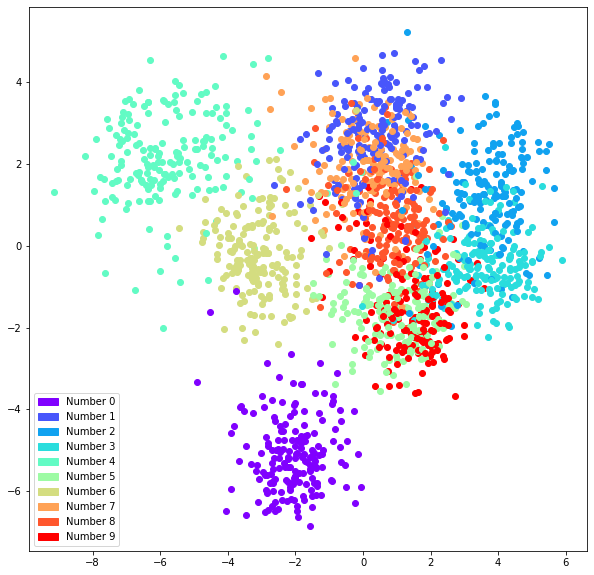

In [10]:

X_embedded_lda = LDA(n_components=2).fit_transform(digits.data, digits.target)


print(X_embedded_lda)
xs = [x[0] for x in X_embedded_lda]
ys = [x[1] for x in X_embedded_lda]
# zs = [x[2] for x in X_embedded]

# ax = plt.figure(figsize=(10, 10)).add_subplot(projection='3d')
plt.figure(figsize=(10, 10))
colors = cm.rainbow(np.linspace(0, 1, 10))

for i in range(digits.target.shape[0]):
  plt.scatter(xs[i], ys[i], color = colors[digits.target[i]], label = 'Number')

patch = [mpatches.Patch(color=colors[i], label='Number ' + str(i)) for i in range(10)]
plt.legend(handles=patch, loc = 'best')

In [69]:
start_time = time.time()
lda_time = []
pca_time = []
tsne_time = []
sample_num = []

for i in np.linspace(50, 1200, num = 15, dtype = int):

  start_time = time.time()
  PCA(n_components=2).fit_transform(data[0:i])
  pca_time.append(time.time() - start_time)
  
  start_time = time.time()
  TSNE(n_components=2, perplexity=50, early_exaggeration=40).fit_transform(data[0:i])
  tsne_time.append(time.time() - start_time)


  start_time = time.time()
  LDA(n_components=2).fit_transform(digits.data[0:i], digits.target[0:i])
  lda_time.append(time.time() - start_time)

  sample_num.append(i)


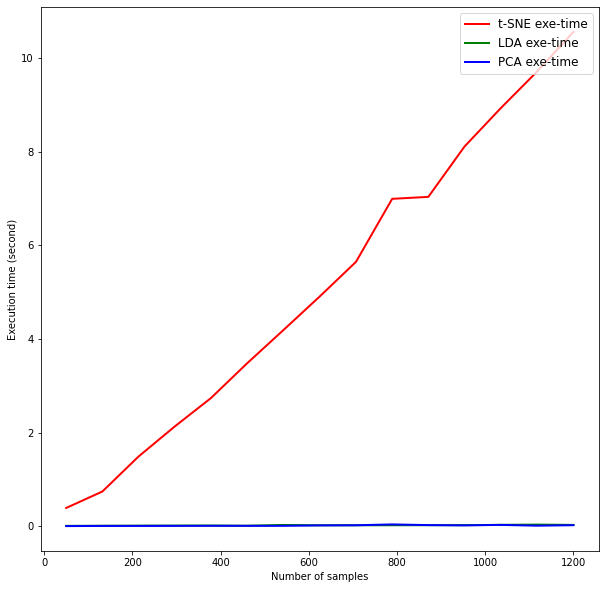

In [56]:
plt.figure(figsize= (10, 10))
plt.plot(sample_num, tsne_time, linewidth=2,
         label="t-SNE exe-time", color='r')
plt.plot(sample_num, lda_time, linewidth=2,
         label="LDA exe-time", color='g')
plt.plot(sample_num, pca_time, linewidth=2,
         label="PCA exe-time", color='b')

plt.xlabel('Number of samples')
plt.ylabel('Execution time (second)')

plt.legend(loc=1, prop={'size': 12})
# plt.suptitle('LDA vs. shrinkage LDA (1 discriminative feature)')
plt.show()

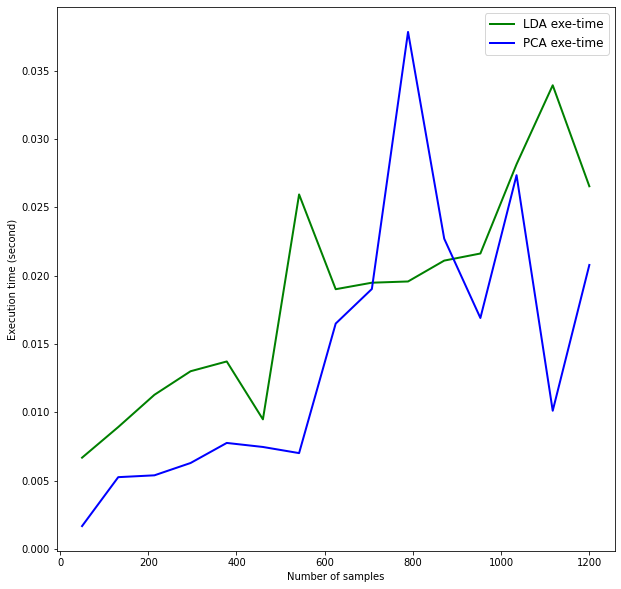

In [57]:
plt.figure(figsize= (10, 10))

plt.plot(sample_num, lda_time, linewidth=2,
         label="LDA exe-time", color='g')
plt.plot(sample_num, pca_time, linewidth=2,
         label="PCA exe-time", color='b')

plt.xlabel('Number of samples')
plt.ylabel('Execution time (second)')

plt.legend(loc=1, prop={'size': 12})
plt.show()

In [66]:
start_time = time.time()
lda_tsne_time = []
pca_tsne_time = []
sample_num = []
tsne_time = []

for i in np.linspace(50, 1200, num = 15, dtype = int):

  start_time = time.time()
  TSNE(n_components=2, perplexity=50, early_exaggeration=40).fit_transform(PCA(n_components=2).fit_transform(data[0:i]))
  pca_tsne_time.append(time.time() - start_time)
  
  start_time = time.time()
  TSNE(n_components=2, perplexity=50, early_exaggeration=40).fit_transform(LDA(n_components=2).fit_transform(digits.data[0:i], digits.target[0:i]))
  lda_tsne_time.append(time.time() - start_time)

  start_time = time.time()
  TSNE(n_components=2, perplexity=50, early_exaggeration=40).fit_transform(data[0:i])
  tsne_time.append(time.time() - start_time)

  sample_num.append(i)

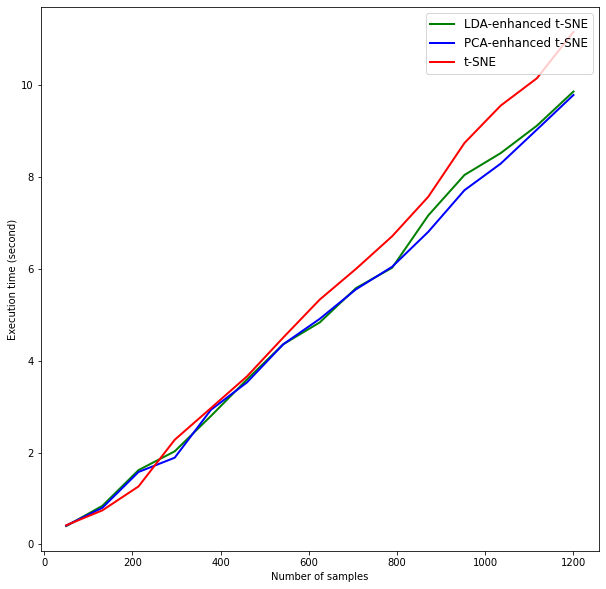

In [71]:
plt.figure(figsize= (10, 10))

plt.plot(sample_num, lda_tsne_time, linewidth=2,
         label="LDA-enhanced t-SNE", color='g')
plt.plot(sample_num, pca_tsne_time, linewidth=2,
         label="PCA-enhanced t-SNE", color='b')
plt.plot(sample_num, tsne_time, linewidth=2,
         label="t-SNE", color='r')
plt.xlabel('Number of samples')
plt.ylabel('Execution time (second)')

plt.legend(loc=1, prop={'size': 12})
plt.show()


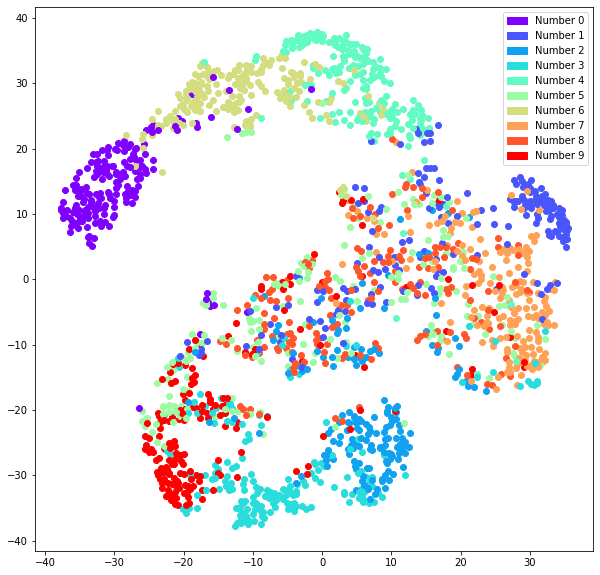

In [72]:
X_embedded_pca_tsne = TSNE(n_components=2, perplexity=50, early_exaggeration=40).fit_transform(PCA(n_components=2).fit_transform(data))

xs = [x[0] for x in X_embedded_pca_tsne]
ys = [x[1] for x in X_embedded_pca_tsne]

plt.figure(figsize=(10, 10))
colors = cm.rainbow(np.linspace(0, 1, 10))

for i in range(digits.target.shape[0]):
  plt.scatter(xs[i], ys[i], color = colors[digits.target[i]], label = 'Number')

patch = [mpatches.Patch(color=colors[i], label='Number ' + str(i)) for i in range(10)]
plt.legend(handles=patch, loc = 'best')

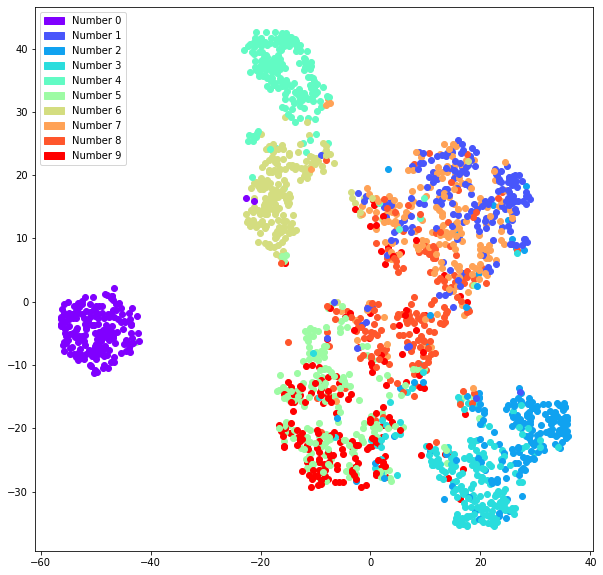

In [73]:
X_embedded_lda_tsne = TSNE(n_components=2, perplexity=50, early_exaggeration=40).fit_transform(LDA(n_components=2).fit_transform(digits.data, digits.target))

xs = [x[0] for x in X_embedded_lda_tsne]
ys = [x[1] for x in X_embedded_lda_tsne]

plt.figure(figsize=(10, 10))
colors = cm.rainbow(np.linspace(0, 1, 10))

for i in range(digits.target.shape[0]):
  plt.scatter(xs[i], ys[i], color = colors[digits.target[i]], label = 'Number')

patch = [mpatches.Patch(color=colors[i], label='Number ' + str(i)) for i in range(10)]
plt.legend(handles=patch, loc = 'best')